# Multivariable regression
## Davood Astaraky
---------------------------------------------------------------
![](./images/new1.png)
## Source
Adopted based on the course on regression models offered by Brian Caffo at Johns Hopkins Bloomberg School of Public Health
## Multi variable regression
---------------------------------------------------------------
## Multivariable regression analysis
If I were to present evidence of a relationship between breath mint useage (mints per day, X) and pulmonary function (measured in FEV), you would be skeptical. Likely, you would say, ‘smokers tend to use more breath mints than non smokers, smoking is related to a loss in pulmonary function. That’s probably the culprit.’

If asked what would convince you, you would likely say, ‘If non-smoking breath mint users had lower lung function than non-smoking non-breath mint users and, similarly, if smoking breath mint users had lower lung function than smoking non-breath mint users, I’d be more inclined to believe you’.

In other words, to even consider my results, I would have to demonstrate that they hold while holding smoking status fixed.

In addition to this use of multivariate regression lets also talk about another use of multivariable regression for predictions. Consider an insurance company is interested in how last year’s claims can predict a person’s time in the hospital this year. They want to use an enormous amount of data contained in claims to predict a single number.

In this case simple linear regression is not equipped to handle more than one predictor.

The questions here are :

How can one generalize SLR to incoporate lots of regressors for the purpose of prediction?
What are the consequences of adding lots of regressors?
Surely there must be consequences to throwing variables in that aren’t related to Y?
Surely there must be consequences to omitting variables that are?
So, there’s multiple parts about this. One of the main things is model search, how do we pick which predictors to include? That’s an important component of this. And the other is to avoid overfittings, we’ll, we’ll learn that as you put enough variables into a multivariable regression model you’ll get zero residuals just by virtue of having included even random vectors into your regression model. So, certainly there’s consequences to throwing lots of garbage predictors into a model and certainly there must be consequences to omitting important predictors in a model.

Normally in the practical machine learning we talk a lot about model selection strategies as they relate to the, to the idea of prediction.In the discussion here, we’re going to focus more on the first problems where we want to generate parsimonious models. Where we’re deeply interested in, in interpreting the coefficients from the linear model. And so the prediction problems like this one are a little bit more geared toward practical machine learning. But here I just wanted to mention that multivariable regression is a pretty good starting point in any prediction, any time where we are developing a prediction algorithm.

## Multivariable linear model
The general linear model extends simple linear regression (SLR) by adding terms linearly into the model.
$$ Y_i = \beta_1X_{1i} + \beta_2X_{2i}+...+\beta_pX_{pi}+ε_i = \sum_{k=1}^{p} X_{ik}\beta_j + ε_i $$
Here X_{1i} = 1 typically,so that an intercept is included.

Least squares (and hence ML estimates under iid Gaussianity of the errors) minimizes
$$ \sum_{i=1}^{n}(Y_i - \sum_{k=1}^pX_{ki}\beta_j)^2 $$
Note, the important linearity is linearity in the coefficients. Thus
$$ Y_i = \beta_1X_{1i}^2+\beta_2X_{2i}^2+...+\beta_pX_{pi}^2+ε_i $$
is still a linear model. (We’ve just squared the elements of the predictor variables.)

## How to get estimates of coefficients
----------------------------------------------------------------
Remember from simple linear regression that, if you have regression to the origin, you want to line that’s forced to the origin that has no intercepts. You have a single predictor X and a single predictor Y and you want no intercept. The slope estimate was just this sum of the product X times Y divided by the sum of the X’s squared.
Therefore the LS estimate for regression through the origin, E[Yi]=X1iβ1E[Yi]=X1iβ1, was ∑XiYi/∑X2i∑XiYi/∑Xi2.
Now let’s just consider, let’s see if we can use that result to derive the least squares estimate when we have two regressors. And thenif you’ve got the gist of this, you could see how it would work for three and how it would work for four and so on.

Let’s consider two regressors,
$$ E[Y_i] = X_{1i}\beta_1+X_{2i}\beta_2=\mu_i $$
Therefore, Least squares tries to minimize
$$ \sum_{i=1}^n (Y_i-X_{1i}\beta_{1}-X_{2i}\beta_2)^2 $$
Here I skip the proof, but if at the end we can prove that the slope estimate would be:
$$ \hat\beta_1 = \frac{\sum_{i=1}^n\epsilon_{i,Y|X_2}\epsilon_{i,X_1|X_2}} {\sum_{i=1}^ne_{i,X_1|X_2}^2} $$
That is, the regression estimate for β1β1 is the regression through the origin estimate having regressed X2X2 out of both the response and the predictor.

(Similarly, the regression estimate for β2β2 is the regression through the origin estimate having regressed X1X1 out of both the response and the predictor.)

More generally, multivariate regression estimates are exactly those having removed the linear relationship of the other variables from both the regressor and response.

Lets demonstrate this in an example with two variables, and simple linear regression :

Consider Yi=β1X1i+β2X2iYi=β1X1i+β2X2i where X2i=1X2i=1 is an intercept term.

Notice the fitted coefficient of X2iX2i on YiYi is Y¯Y¯. The residuals ei,Y|X2=Yi−Y¯ei,Y|X2=Yi−Y¯

Notice the fitted coefficient of X2iX2i on X1iX1i is X¯1X¯1. The residuals ei,X1|X2=X1i−X¯1ei,X1|X2=X1i−X¯1

Thus
$$ \hat\beta_1 = \frac{\sum_{i=1}^n\epsilon_{i,Y|X_2}\epsilon_{i,X_1|X_2}} {\sum_{i=1}^ne_{i,X_1|X_2}^2} 
= \frac{\sum_{i=1}^n(X_i-\bar X)(Y_i- \bar Y)}{\sum_{i=1}^n(X_i- \bar X)^2} = Cor(X,Y)\frac{Sd(Y)}{Sd(X)} $$
So now let’s extend this to more than two variables, so that we can start dipping into the idea of multivariable regression:

Least squares solutions have to minimize
$$ \sum_{i=1}^n (Y_i-X_{1i}\beta_{1}-X_{pi}\beta_p)^2 $$
The least squares estimate for the coefficient of a multivariate regression model is exactly regression through the origin with the linear relationships with the other regressors removed from both the regressor and outcome by taking residuals.

In this sense, multivariate regression “adjusts” a coefficient for the linear impact of the other variables.



## Demonstration using an example
------------------------------------------------------------
Linear model with two variables;

In [120]:
n = 100; 
x = rnorm(n); 
x2 = rnorm(n);
x3 = rnorm(n)
y = 1 + x + x2 + x3 + rnorm(n, sd = .1)
ey = resid(lm(y ~ x2 + x3))
ex = resid(lm(x ~ x2 + x3))
sum(ey * ex) / sum(ex ^ 2)

[1] 0.9881654

In [121]:
coef(lm(ey ~ ex - 1))

ex 
0.9881654

In [122]:
coef(lm(y ~ x + x2 + x3)) 


(Intercept)           x          x2          x3 
  0.9891179   0.9881654   0.9867264   1.0084947

And you see the `x` term is exactly the same as the regression to the origin estimate with the residuals. So again, that just goes to show you the way we interpret, or the way in which linear models adjust the regression estimate with respect to the other variable. It’s sort of like the effect of the other variables has been removed from both the predictor and the response.

## Interpretation of the coefficients
--------------------------------
So let’s go through how you interpret regression coefficients with respect to the model right now.

So our regression predictor, given that our collection of covariants take a specific value x1 to xp, is just the sum of the xs times their coefficients. Right, that’s our linear model:

$$ E[Y|X_1 = x_1,...,X_p = x_p] = \sum_{k=1}^p(x_k\beta_k) $$
But just think if one of those regression coefficients, let’s just take it specific, the first one, is incremented by 1.
$$ E[Y|X_1 = x_1 + 1,...,X_p = x_p] = (x_1 + 1)\beta_1 + \sum_{k=2}^p(x_k\beta_k) $$
$$ E[Y|X_1 = x_1 + 1,...,X_p = x_p]-E[Y|X_1 = x_1,...,X_p = x_p] = (x_1+1)\beta_1+\sum_{k=2}^p(x_k\beta_k)+\sum_{k=1}^p(x_k\beta_k)=\beta_1 $$
So that the interpretation of a multivariate regression coefficient is the expected change in the response per unit change in the regressor, holding all of the other regressors fixed.

Later on, we’ll do examples and go over context-specific interpretations.
## Fitted values, residuals and residual variation
And then I’m just going to go right now through a laundry list of the, interpret, of the basic components of the linear model, because they’re just exactly the same as in simple linear regression.

All of our SLR quantities can be extended to linear models :

* Model Yi=∑pk=1Xikβk+ϵiYi=∑k=1pXikβk+ϵi where ϵi∼N(0,σ2)ϵi∼N(0,σ2)

* Fitted responses Ŷ i=∑pk=1Xikβ̂ kY^i=∑k=1pXikβ^k

* Residuals ei=Yi−Ŷ iei=Yi−Y^i

* Variance estimate σ̂ 2=1n−p∑ni=1e2iσ^2=1n−p∑i=1nei2

* To get predicted responses at new values, x1,…,xpx1,…,xp, simply plug them into the linear model ∑pk=1xkβ̂ k∑k=1pxkβ^k

* Coefficients have standard errors, σ̂ β̂ kσ^β^k, and β̂ k−βkσ̂ β̂ kβ^k−βkσ^β^k follows a TT distribution with n−pn−p degrees of freedom.

* Predicted responses have standard errors and we can calculate predicted and expected response intervals.

## Important conclusion about linear models
--------------------------------
I want to end this section with just a, a general discussion of how important linear models are to the data scientist.

Before you do any machine learning or any complex algorithms, linear models should be your first attempt. They offer parsimonious and well-understood, easily described relationships between predictors and response.

Now to be fair, you know, some modern machine learning algorithms can, can beat some of the things like the imposed linearity. Nonetheless, linear models should always be your starting point.

And there’s some amazing things you can do with linear models that you may not just from this first treatment of them, from this one lecture think about, think that there that, that would be possible.

For example you can take a time series like a music sound or something like that and decompose it into its harmonics.

The so-called discrete Fourier transform can be thought of as the fit from a linear model.

You can flexibly fit rather complicated functions and curves and things like that using linear models. You can fit factor variables as predictors, ANOVA is a special case of linear models and COVA is a special case of linear models.

You can uncover complex multivariate relationships with the response and you can build fairly accurate prediction models.

Thefeore I can summarize to say that :

Linear models are the single most important applied statistical and machine learning techniqe, _by far._

Some amazing things that you can accomplish with linear models :

* Decompose a signal into its harmonics.
* Flexibly fit complicated functions.
* Fit factor variables as predictors.
* Uncover complex multivariate relationships with the response.
* Build accurate prediction models.

## Multivariable regression examples
--------------------------------
### Looking at the data set
--------------------------------
Let’s start by looking at the Swiss fertility data which inlcudes standardized fertility measure and socio-economic indicators for each of 47 French-speaking provinces of Switzerland at about 1888.

A data frame with 47 observations on 6 variables, each of which is in percent, i.e., in [0, 100].

* [,1] Fertility a common standardized fertility measure
* [,2] Agriculture % of males involved in agriculture as occupation
* [,3] Examination % draftees receiving highest mark on army examination
* [,4] Education % education beyond primary school for draftees
* [,5] Catholic % catholic (as opposed to protestant)
* [,6] Infant.Mortality live births who live less than 1 year
All variables but Fertility give proportions of the population. So our outcome that we’re interested in is fertility.

In [123]:
library(knitr)
library(printr)
library(datasets)
data(swiss)
kable(head(swiss),align = 'c')


ERROR: Error in library(printr): there is no package called 'printr'


Before going any further lets do a basic scatterplot of the data. Below we create a nice pairwise scatter plots. This is a nice way to investigate the relationship between all the variables in this data set.
## Fitting a linear model with no interactions
--------------------------------
So the first thing we do here is to use all these variables to predict fertility. So we consider a linear model with no interactions.

In [ ]:
summary(lm(Fertility ~ . , data = swiss))$coefficients

Agriculture is expressed in percentages (0 - 100). Estimate is -0.1721.

Our models estimates an **expected** 0.17 decrease in standardized fertility for every 1% increase in percentage of males involved in agriculture in **holding the remaining variables constant.** Also its important to remember that agriculture is expressed as a percentage rather than proportion.

The standard error `0.070` talks about how percise this coefficient is. It talks about the statistical variability of that coefficient and we get `0.07`.

If we perform the hypothesis test, the t-test for H0:βAgri=0H0:βAgri=0 versus Ha:βAgri≠0Ha:βAgri≠0 is significant. (the t-statistics would be Estimate−0standarderror=−0.172−00.070=−2.448Estimate−0standarderror=−0.172−00.070=−2.448)


Now lets look at other models and see how the process of model selection changes our estimate. Now lets contrast the model with a model that just has Agriculture as a predictor.



In [ ]:
summary(lm(Fertility ~ Agriculture, data = swiss))$coefficients

Interestingly, the unadjusted estimate for Agriculture has changes sing and now has a positive effect on fertility. Notice that in both case the coefficient is strongly statistically suignificant.
## A simulation example illustrating adjustment
-------------------------------------------------------
How can adjustment reverse the sign of an effect? Let’s try a simulation example and see how this could happen.

In [ ]:
n <- 100
x2 <- 1 : n
x1 <- .01 * x2 + runif(n, -.1, .1)
y = -x1 + x2 + rnorm(n, sd = .01)
summary(lm(y ~ x1))$coef

In [ ]:
summary(lm(y ~ x1 + x2))$coef

As you see if we only inlcude `x1` (the wrong model)we get a large estimate for it and when we inlcude `x2` as well (the correct model), we get two correct coefficients. Lets do some plots to hilight how this works :

In [ ]:
library(ggplot2) 
dat = data.frame(y = y, x1 = x1, x2 = x2, ey = resid(lm(y ~ x2)), ex1 = resid(lm(x1 ~ x2)))
g = ggplot(dat, aes(y = y, x = x1, colour = x2))
g = g + geom_point(colour="grey50", size = 5) + 
        geom_smooth(method = lm, se = FALSE, colour = "black") + 
        geom_point(size = 4) 
g

The sign reverses itself with the inclusion of Examination and Education.

The percent of males in the province working in agriculture is negatively related to educational attainment (correlation of -0.6395225) and Education and Examination (correlation of 0.6984153) are obviously measuring similar things.

Is the positive marginal an artifact for not having accounted for, say, Education level? (Education does have a stronger effect, by the way.)

At the minimum, anyone claiming that provinces that are more agricultural have higher fertility rates would immediately be open to criticism.
## What if we include an unnecessary variable?
------------------------------------------------
z adds no new linear information, since it’s a **linear combination** of variables already included. R just drops terms that are linear combinations of other terms.

In [ ]:
z <- swiss$Agriculture + swiss$Education
lm(Fertility ~ . + z, data = swiss)

## Dummy variables are smart
------------------------------------
You can fit factor variables as regressors and come up with thing like analysis of varaince as a special case of linear models. Lets go through an example and see what happens when we include the factor variable in the regression model.

Consider the linear model
$$ Y_i=\beta_0+X_{i1}\beta_1+\epsilon_i $$
where each Xi1Xi1 is binary so that it is a 1 if measurement ii is in a group and 0 otherwise. (Treated versus not in a clinical trial, for example.)

Then for people in the group E[Yi]=β0+β1E[Yi]=β0+β1

And for people not in the group E[Yi]=β0E[Yi]=β0

The LS fits work out to be β̂ 0+β̂ 1β^0+β^1 is the mean for those in the group and β̂ 0β^0 is the mean for those not in the group.

β1β1 is interpretted as the increase or decrease in the mean comparing those in the group to those not.

Note including a binary variable that is 1 for those not in the group would be redundant. It would create three parameters to describe two means.

We can extend this to more than 2 levels :

Consider a multilevel factor level. For didactic reasons, let’s say a three level factor (example, US political party affiliation: Republican, Democrat, Independent)

As a result we will have this model :

Yi=β0+Xi1β1+Xi2β2+ϵiYi=β0+Xi1β1+Xi2β2+ϵi.

Where :

Xi1 is 1 for Republicans and 0 otherwise.

Xi2 is 1 for Democrats and 0 otherwise.

If i is Republican E[Yi]=β0+β1

If i is Democrat E[Yi]=β0+β2.

If i is Independent E[Yi]=β0.

β1 compares Republicans to Independents.

β2 compares Democrats to Independents.

β1−β2 compares Republicans to Democrats.

(Choice of reference category changes the interpretation.)

R would do this automatically if you include factor variables. It picks one of the levels to be the reference category. What is important is that the interpretatio of coefficients would be different depending on which category has been set has the reference category.

### Example
Lets go through some example where we look at a factor variable and see how R is treating it :

we look at the `Insect Sprays` data . The description of the variables are :

A data frame with 72 observations on 2 variables.

* [,1] count numeric, Insect count
* [,2] spray factor, The type of spray
The first few records of the dataset :

In [124]:
data(InsectSprays)
kable(head(InsectSprays),align = 'c')



| count | spray |
|:-----:|:-----:|
|  10   |   A   |
|   7   |   A   |
|  20   |   A   |
|  14   |   A   |
|  14   |   A   |
|  12   |   A   |

Let's plot the data by the factor level :

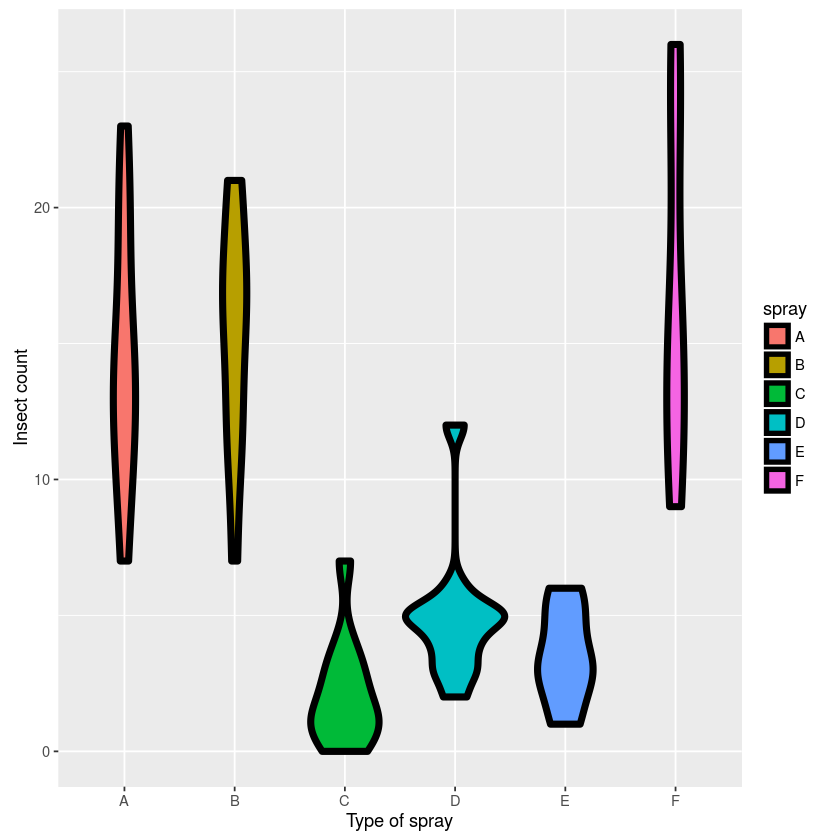

In [125]:
library(stats) 
g = ggplot(data = InsectSprays, aes(y = count, x = spray, fill  = spray))
g = g + geom_violin(colour = "black", size = 2)
g = g + xlab("Type of spray") + ylab("Insect count")
g

Now lets see how we can test the difference between factors using a linera model. In this model group A is the reference :

In [126]:
summary(lm(count ~ spray, data = InsectSprays))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.5000000,1.132156,12.8074279,1.470512e-19
sprayB,0.8333333,1.601110,0.5204724,6.044761e-01
sprayC,-12.4166667,1.601110,-7.7550382,7.266893e-11
sprayD,-9.5833333,1.601110,-5.9854322,9.816910e-08
sprayE,-11.0000000,1.601110,-6.8702352,2.753922e-09
sprayF,2.1666667,1.601110,1.3532281,1.805998e-01


All the estimates provided here are in comparison with spray A. For example `0.833` is the change in the change in the mean between spray B and spray A. In this case the intercept `14.50` is the mean for spray A. You can verify that from the plot as well.

Now for example if we wanted to compare spray B with spray C, we should subtract estimate for spray B from C.

**Hard coding the dummy variables**

Now lets see how we can hardcode the model and not rely on R to pick the reference level. This will show what actually R is doing behind the scence.

In [127]:
summary(lm(count ~ 
             I(1 * (spray == 'B')) + I(1 * (spray == 'C')) + 
             I(1 * (spray == 'D')) + I(1 * (spray == 'E')) +
             I(1 * (spray == 'F'))
           , data = InsectSprays))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.5000000,1.132156,12.8074279,1.470512e-19
"I(1 * (spray == ""B""))",0.8333333,1.601110,0.5204724,6.044761e-01
"I(1 * (spray == ""C""))",-12.4166667,1.601110,-7.7550382,7.266893e-11
"I(1 * (spray == ""D""))",-9.5833333,1.601110,-5.9854322,9.816910e-08
"I(1 * (spray == ""E""))",-11.0000000,1.601110,-6.8702352,2.753922e-09
"I(1 * (spray == ""F""))",2.1666667,1.601110,1.3532281,1.805998e-01


**What if we include all 6?**

Now lets see what happens if we include all six sprays including spray A :



In [128]:
summary(lm(count ~ 
   I(1 * (spray == 'B')) + I(1 * (spray == 'C')) +  
   I(1 * (spray == 'D')) + I(1 * (spray == 'E')) +
   I(1 * (spray == 'F')) + I(1 * (spray == 'A')), data = InsectSprays))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.5000000,1.132156,12.8074279,1.470512e-19
"I(1 * (spray == ""B""))",0.8333333,1.601110,0.5204724,6.044761e-01
"I(1 * (spray == ""C""))",-12.4166667,1.601110,-7.7550382,7.266893e-11
"I(1 * (spray == ""D""))",-9.5833333,1.601110,-5.9854322,9.816910e-08
"I(1 * (spray == ""E""))",-11.0000000,1.601110,-6.8702352,2.753922e-09
"I(1 * (spray == ""F""))",2.1666667,1.601110,1.3532281,1.805998e-01


Notice that the output gives `NA` for the estimate of spray A, and the reason for that is that its redundant.
**What if we omit the intercept?**

What if I want my coefficients to be the mean for each group rather than levels referenced to a control level. We can do that by removing the intercept.

In [129]:
library(dplyr)
summary(lm(count ~ spray - 1, data = InsectSprays))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
sprayA,14.500000,1.132156,12.807428,1.470512e-19
sprayB,15.333333,1.132156,13.543487,1.001994e-20
sprayC,2.083333,1.132156,1.840148,7.024334e-02
sprayD,4.916667,1.132156,4.342749,4.953047e-05
sprayE,3.500000,1.132156,3.091448,2.916794e-03
sprayF,16.666667,1.132156,14.721181,1.573471e-22


In [130]:
summarise(group_by(InsectSprays, spray), mn = mean(count))

spray,mn
A,14.500000
B,15.333333
C,2.083333
D,4.916667
E,3.500000
F,16.666667


Now each estimate is the mean for ach group.

**Reordering the levels**

Now what happens if we change the refernce level to ‘Spray C’ rather ?

In [131]:
spray2 <- relevel(InsectSprays$spray, "C")
summary(lm(count ~ spray2, data = InsectSprays))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.083333,1.132156,1.840148,7.024334e-02
spray2A,12.416667,1.601110,7.755038,7.266893e-11
spray2B,13.250000,1.601110,8.275511,8.509776e-12
spray2D,2.833333,1.601110,1.769606,8.141205e-02
spray2E,1.416667,1.601110,0.884803,3.794750e-01
spray2F,14.583333,1.601110,9.108266,2.794343e-13


Notice that now the estimates are interpreted as the difference between C and that group.

**A recap**

* If we treat Spray as a factor, R includes an intercept and omits the alphabetically first level of the factor.
* All t-tests are for comparisons of Sprays versus Spray A.
* Emprirical mean for A is the intercept.
* Other group means are the itc plus their coefficient.
* If we omit an intercept, then it includes terms for all levels of the factor.
* Group means are the coefficients.
* Tests are tests of whether the groups are different than zero. (Are the expected counts zero for that spray.)
* If we want comparisons between, Spray B and C, say we could refit the model with C (or B) as the reference level.

**Other thoughts on this data**

The analysis we perfomed on this data is not completed becuase some of the important assumptions are violated, specifically:

* We have Counts are bounded from below by 0 that violates the assumption of normality of the errors. Also there are counts near zero, so both the actual assumption and the intent of the assumption are violated.

* Variance does not appear to be constant. So our means and our estimates are probably correct, but our inrefernces surely not.

* Perhaps taking logs of the counts would help. There are 0 counts, so maybe log(Count + 1)

* Also later, we’ll cover Poisson GLMs for fitting count data.

## Looking at another example that demonstrates ANCOVA
----
Recall the `swiss` data set once again:



In [132]:
data(swiss)
kable(head(swiss),align = 'c')



|             | Fertility | Agriculture | Examination | Education | Catholic | Infant.Mortality |
|:------------|:---------:|:-----------:|:-----------:|:---------:|:--------:|:----------------:|
|Courtelary   |   80.2    |    17.0     |     15      |    12     |   9.96   |       22.2       |
|Delemont     |   83.1    |    45.1     |      6      |     9     |  84.84   |       22.2       |
|Franches-Mnt |   92.5    |    39.7     |      5      |     5     |  93.40   |       20.2       |
|Moutier      |   85.8    |    36.5     |     12      |     7     |  33.77   |       20.3       |
|Neuveville   |   76.9    |    43.5     |     17      |    15     |   5.16   |       20.6       |
|Porrentruy   |   76.1    |    35.3     |      9      |     7     |  90.57   |       26.6       |

Here I want to demonstrate how to fit different lines, one for each group. So below I create a binary variable that is 1 if the province is majority catholic :

In [133]:
library(dplyr); 
swiss = mutate(swiss, CatholicBin = 1 * (Catholic > 50))
head(swiss)

Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,CatholicBin
80.2,17.0,15,12,9.96,22.2,0
83.1,45.1,6,9,84.84,22.2,1
92.5,39.7,5,5,93.40,20.2,1
85.8,36.5,12,7,33.77,20.3,0
76.9,43.5,17,15,5.16,20.6,0
76.1,35.3,9,7,90.57,26.6,1


Now lets plot the data :

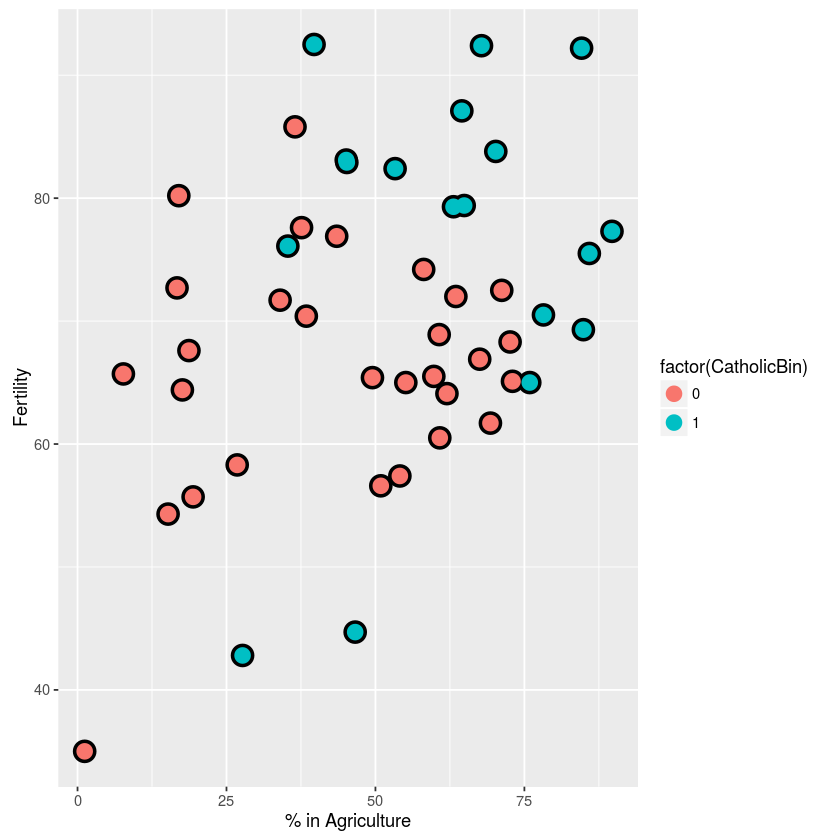

In [134]:
g = ggplot(swiss, aes(x = Agriculture, y = Fertility, colour = factor(CatholicBin)))
g = g + geom_point(size = 6, colour = "black") + geom_point(size = 4)
g = g + xlab("% in Agriculture") + ylab("Fertility")
g

For now lets ignore the effect of outliers and other variables and simply work on fitting lines where we need one line for majority catholic provinces and one for majority protestan.

**Model 1) No effect of religion**

In model one, we disregrad the effect of religion entirely .

In [135]:
summary(lm(Fertility ~ Agriculture, data = swiss))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),60.3043752,4.25125562,14.185074,3.216304e-18
Agriculture,0.1942017,0.07671176,2.531577,1.491720e-02


The associated fitted line would be :

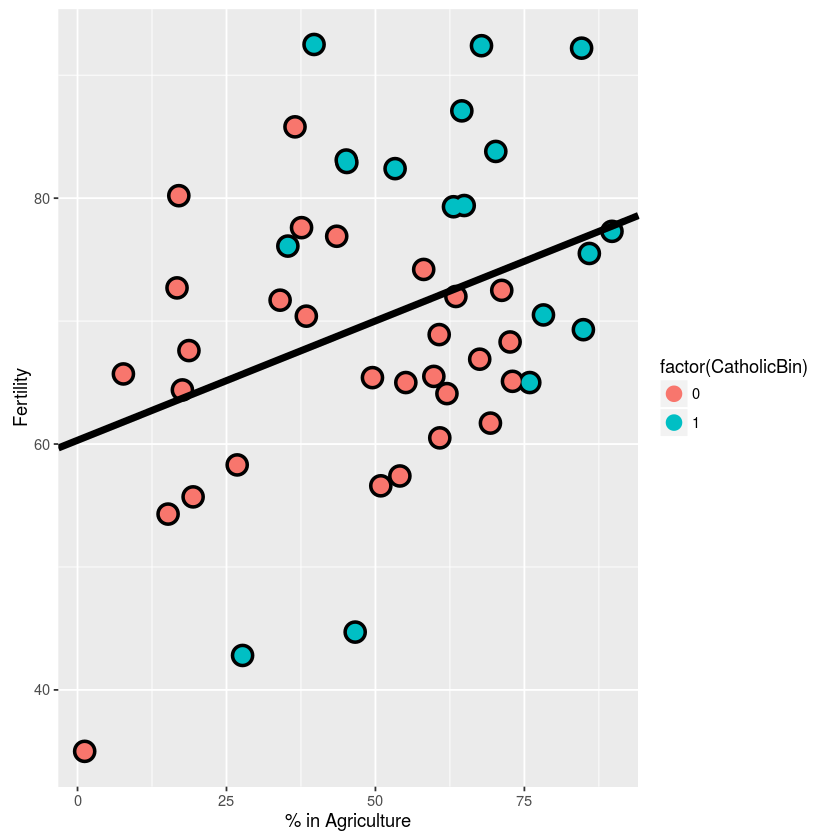

In [139]:
fit = lm(Fertility ~ Agriculture, data = swiss)
g1 = g
g1 = g1 + geom_abline(intercept = coef(fit)[1], slope = coef(fit)[2], size = 2)
g1

**Model 2) Parallel lines with no intercation**

Model two inludes both Agriculture and religion with no interaction.

In [140]:
summary(lm(Fertility ~ Agriculture + factor(CatholicBin), data = swiss))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),60.8322366,4.1058630,14.815944,1.032493e-18
Agriculture,0.1241776,0.0810977,1.531210,1.328763e-01
factor(CatholicBin)1,7.8843292,3.7483622,2.103406,4.118221e-02


The associated fitted lines would be : ## Code missing
**Model 3) Lines with different slopes and intercepts**

Model three involves both variables and inluces intercation:

In [141]:
summary(lm(Fertility ~ Agriculture * factor(CatholicBin), data = swiss))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),62.04993019,4.78915566,12.9563402,1.919379e-16
Agriculture,0.09611572,0.09881204,0.9727127,3.361364e-01
factor(CatholicBin)1,2.85770359,10.62644275,0.2689238,7.892745e-01
Agriculture:factor(CatholicBin)1,0.08913512,0.17610660,0.5061430,6.153416e-01


The associated fitted lines would be :

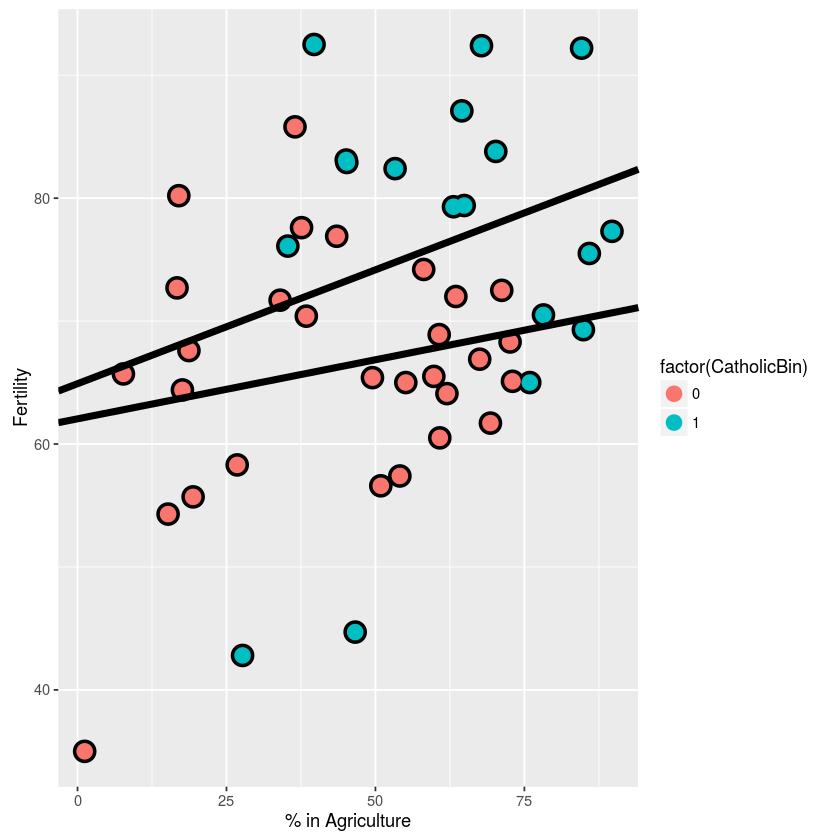

In [142]:
fit = lm(Fertility ~ Agriculture * factor(CatholicBin), data = swiss)
g1 = g
g1 = g1 + geom_abline(intercept = coef(fit)[1], slope = coef(fit)[2], size = 2)
g1 = g1 + geom_abline(intercept = coef(fit)[1] + coef(fit)[3], 
                          slope = coef(fit)[2] + coef(fit)[4], size = 2)
g1


Just to show you it can be done

In [143]:
summary(lm(Fertility ~ Agriculture + Agriculture : factor(CatholicBin), data = swiss))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),62.63037278,4.22989475,14.8066031,1.056741e-18
Agriculture,0.08539357,0.08945287,0.9546209,3.449849e-01
Agriculture:factor(CatholicBin)1,0.13339603,0.06198753,2.1519817,3.692561e-02


## Simulation to demonstrate adjustment
-----
I thi section we will go through some simulated data to show some examples of adjustment and what adjustment is accomplishing and what kinds of things can happen.
### Simulation 1
-----



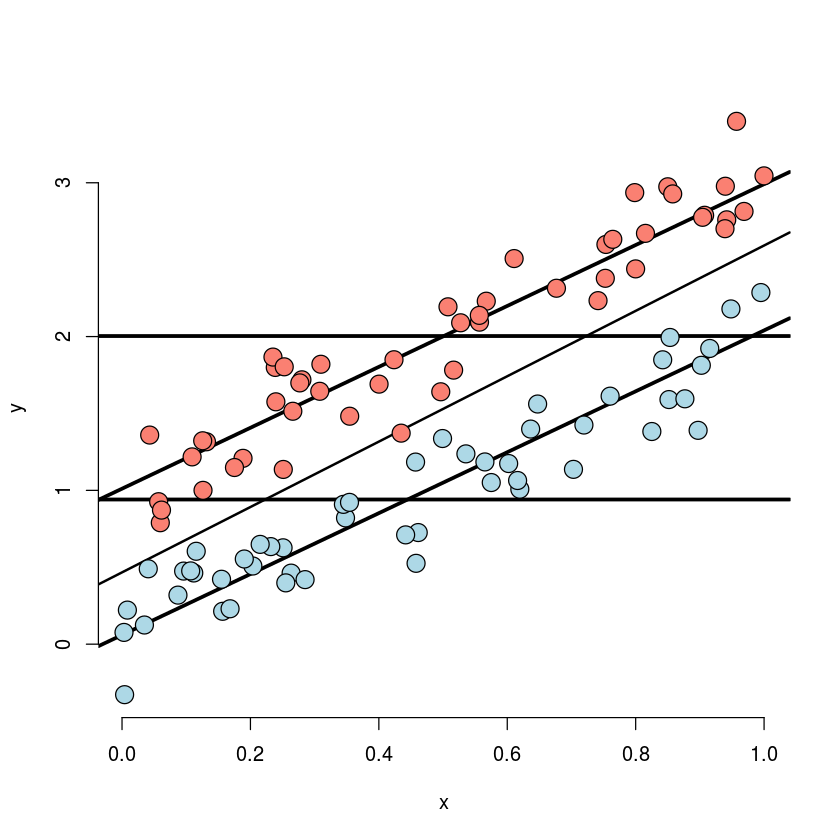

In [144]:
n <- 100; t <- rep(c(0, 1), c(n/2, n/2)); x <- c(runif(n/2), runif(n/2)); 
beta0 <- 0; beta1 <- 2; tau <- 1; sigma <- .2
y <- beta0 + x * beta1 + t * tau + rnorm(n, sd = sigma)
plot(x, y, type = "n", frame = FALSE)
abline(lm(y ~ x), lwd = 2)
abline(h = mean(y[1 : (n/2)]), lwd = 3)
abline(h = mean(y[(n/2 + 1) : n]), lwd = 3)
fit <- lm(y ~ x + t)
abline(coef(fit)[1], coef(fit)[2], lwd = 3)
abline(coef(fit)[1] + coef(fit)[3], coef(fit)[2], lwd = 3)
points(x[1 : (n/2)], y[1 : (n/2)], pch = 21, col = "black", bg = "lightblue", cex = 2)
points(x[(n/2 + 1) : n], y[(n/2 + 1) : n], pch = 21, col = "black", bg = "salmon", cex = 2)

This is a pretty good example of regression adjustment. The true lines are parallel so that the effect of treatment holding x constant is the same. So regardless of what x we will look at, that distance is the same. So in this case it makes sense to talk about a treatment effect.

To summarize :

* The X variable is unrelated to group status
* The X variable is related to Y, but the intercept depends on group status.
* The group variable is related to Y.
* The relationship between group status and Y is constant depending on X.
* The relationship between group and Y disregarding X is about the same as holding X constant

### Simulation 2
------



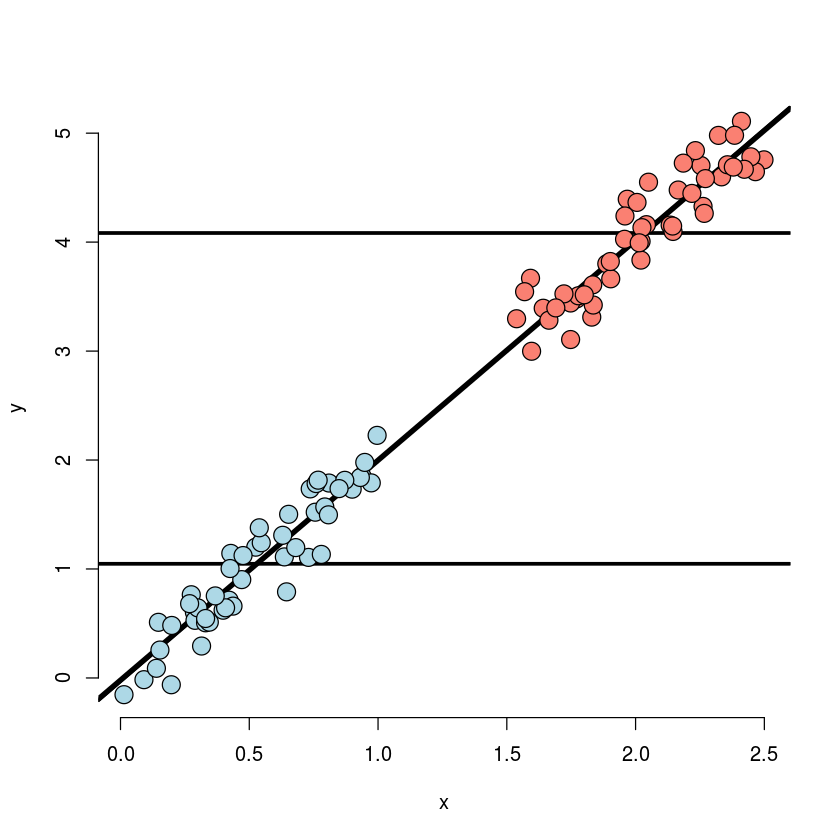

In [145]:
n <- 100; t <- rep(c(0, 1), c(n/2, n/2)); x <- c(runif(n/2), 1.5 + runif(n/2)); 
beta0 <- 0; beta1 <- 2; tau <- 0; sigma <- .2
y <- beta0 + x * beta1 + t * tau + rnorm(n, sd = sigma)
plot(x, y, type = "n", frame = FALSE)
abline(lm(y ~ x), lwd = 2)
abline(h = mean(y[1 : (n/2)]), lwd = 3)
abline(h = mean(y[(n/2 + 1) : n]), lwd = 3)
fit <- lm(y ~ x + t)
abline(coef(fit)[1], coef(fit)[2], lwd = 3)
abline(coef(fit)[1] + coef(fit)[3], coef(fit)[2], lwd = 3)
points(x[1 : (n/2)], y[1 : (n/2)], pch = 21, col = "black", bg = "lightblue", cex = 2)
points(x[(n/2 + 1) : n], y[(n/2 + 1) : n], pch = 21, col = "black", bg = "salmon", cex = 2)

Here if we take the difference between treated and control we get a massive effect. Then, if we adjust for X, then there’s no effect. Because the lines, the blue for guys and the line for the red guys, assuming they’re parallel and, regardless of whether they’re assumed to be parallel, their true difference in intercept is going to be very small.

Another thing to point out is that there’s almost no overlap. There’s almost no, direct comparison of the treated and untreated group, at a specific value of X. If you hold X constant, at any value, you don’t have any, both red and blue dots. You only have blue dots or red dots which means these groups aren’t terribly comparable

To summarize :

* The X variable is highly related to group status
* The X variable is related to Y, the intercept doesn’t depend on the group variable.
* The X variable remains related to Y holding group status constant
* The group variable is marginally related to Y disregarding X.
* The model would estimate no adjusted effect due to group.
* There isn’t any data to inform the relationship between group and Y.
* This conclusion is entirely based on the model.

### Simulation 3
-----

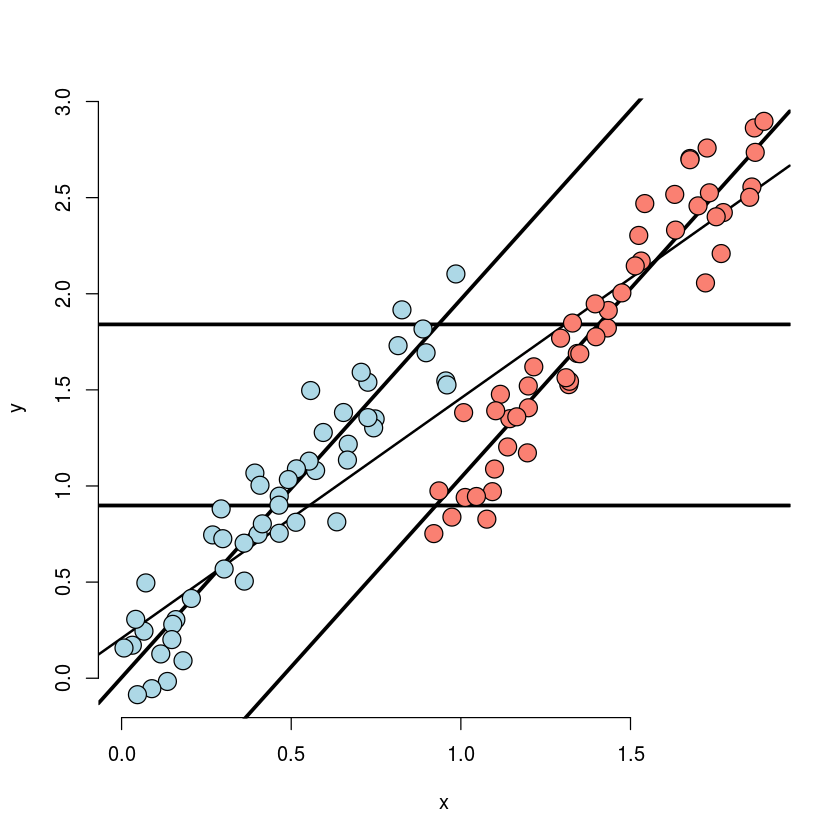

In [146]:
n <- 100; t <- rep(c(0, 1), c(n/2, n/2)); x <- c(runif(n/2), .9 + runif(n/2)); 
beta0 <- 0; beta1 <- 2; tau <- -1; sigma <- .2
y <- beta0 + x * beta1 + t * tau + rnorm(n, sd = sigma)
plot(x, y, type = "n", frame = FALSE)
abline(lm(y ~ x), lwd = 2)
abline(h = mean(y[1 : (n/2)]), lwd = 3)
abline(h = mean(y[(n/2 + 1) : n]), lwd = 3)
fit <- lm(y ~ x + t)
abline(coef(fit)[1], coef(fit)[2], lwd = 3)
abline(coef(fit)[1] + coef(fit)[3], coef(fit)[2], lwd = 3)
points(x[1 : (n/2)], y[1 : (n/2)], pch = 21, col = "black", bg = "lightblue", cex = 2)
points(x[(n/2 + 1) : n], y[(n/2 + 1) : n], pch = 21, col = "black", bg = "salmon", cex = 2)

let’s look at this example, which highlights the importance of adjustment. In this case, the treatment effect completely reverses itself.

Therefore:

* Marginal association has red group higher than blue.
* Adjusted relationship has blue group higher than red.
* Group status related to X. (although we do have some overlap)
* There is some direct evidence for comparing red and blue holding X fixed.

### Simulation 4
-----


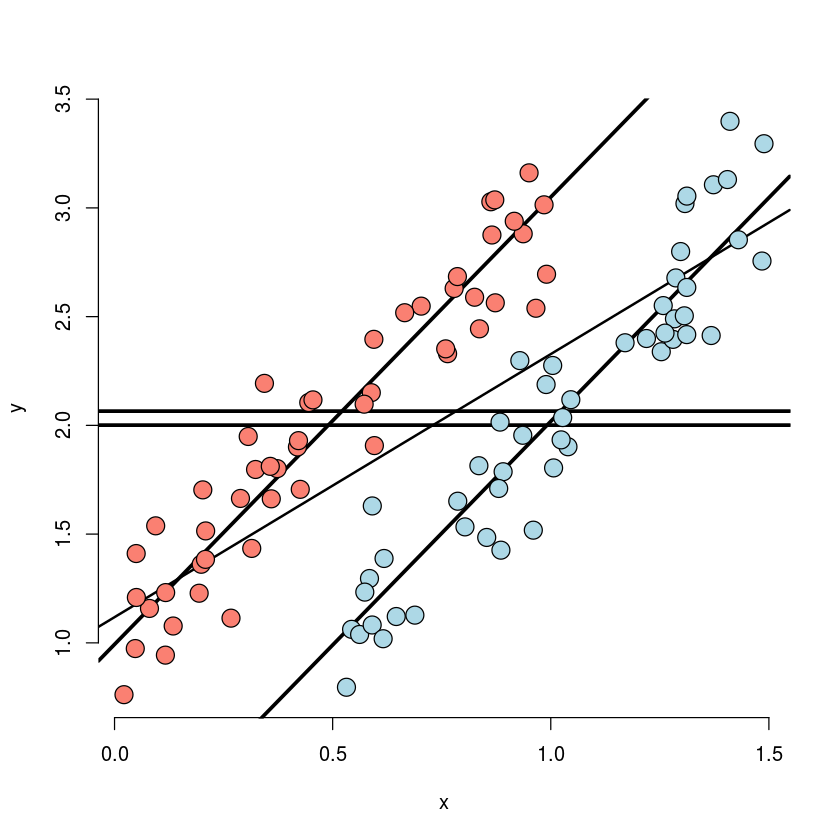

In [147]:
n <- 100; t <- rep(c(0, 1), c(n/2, n/2)); x <- c(.5 + runif(n/2), runif(n/2)); 
beta0 <- 0; beta1 <- 2; tau <- 1; sigma <- .2
y <- beta0 + x * beta1 + t * tau + rnorm(n, sd = sigma)
plot(x, y, type = "n", frame = FALSE)
abline(lm(y ~ x), lwd = 2)
abline(h = mean(y[1 : (n/2)]), lwd = 3)
abline(h = mean(y[(n/2 + 1) : n]), lwd = 3)
fit <- lm(y ~ x + t)
abline(coef(fit)[1], coef(fit)[2], lwd = 3)
abline(coef(fit)[1] + coef(fit)[3], coef(fit)[2], lwd = 3)
points(x[1 : (n/2)], y[1 : (n/2)], pch = 21, col = "black", bg = "lightblue", cex = 2)
points(x[(n/2 + 1) : n], y[(n/2 + 1) : n], pch = 21, col = "black", bg = "salmon", cex = 2)

So, In this case basically, there is no association between treatment, if we fail to adjust for x. But if we adjust for x (holding X constant), we get a strong association. Obviously, we get clearly incorrect regression line, if we don’t account for group status.

so just to summarize these points :

* No marginal association between group status and Y.
* Strong adjusted relationship.
* Group status not related to X. (If I tild you X you wouldnt be able to tell which group it falls into)
* There is lots of direct evidence for comparing red and blue holding X fixed.

### Simulation 5

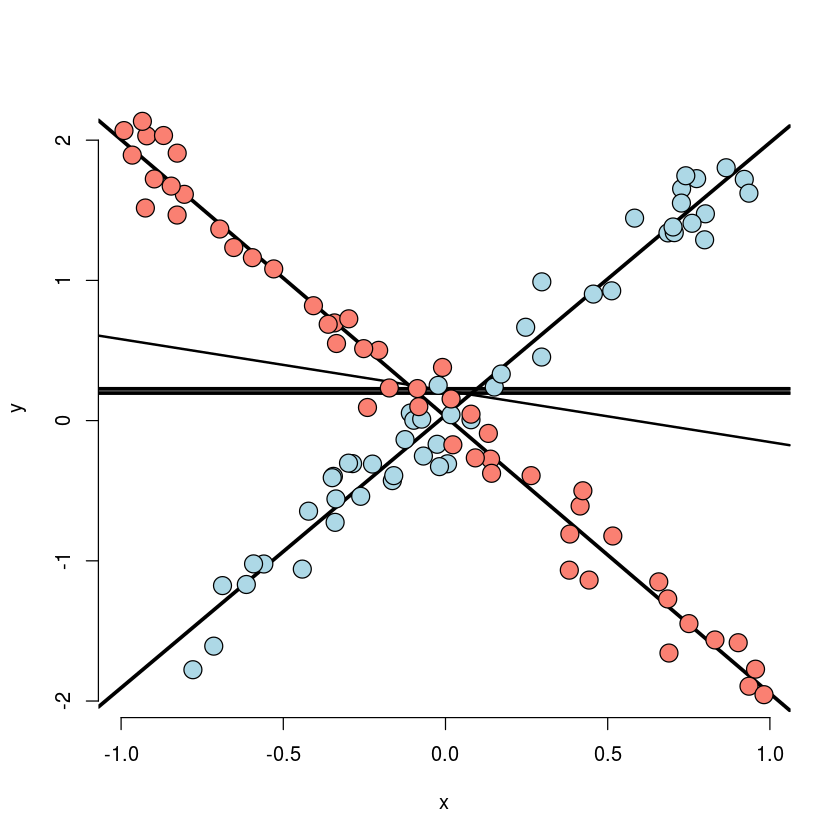

In [148]:
n <- 100; t <- rep(c(0, 1), c(n/2, n/2)); x <- c(runif(n/2, -1, 1), runif(n/2, -1, 1)); 
beta0 <- 0; beta1 <- 2; tau <- 0; tau1 <- -4; sigma <- .2
y <- beta0 + x * beta1 + t * tau + t * x * tau1 + rnorm(n, sd = sigma)
plot(x, y, type = "n", frame = FALSE)
abline(lm(y ~ x), lwd = 2)
abline(h = mean(y[1 : (n/2)]), lwd = 3)
abline(h = mean(y[(n/2 + 1) : n]), lwd = 3)
fit <- lm(y ~ x + t + I(x * t))
abline(coef(fit)[1], coef(fit)[2], lwd = 3)
abline(coef(fit)[1] + coef(fit)[3], coef(fit)[2] + coef(fit)[4], lwd = 3)
points(x[1 : (n/2)], y[1 : (n/2)], pch = 21, col = "black", bg = "lightblue", cex = 2)
points(x[(n/2 + 1) : n], y[(n/2 + 1) : n], pch = 21, col = "black", bg = "salmon", cex = 2)

Here there is no such thing as treatment effect. So, you couldn’t call this the treatment effect, because like, right in the middle, the treatment effect is 0, and toward the very right/left the treatment effect is huge.

So this is an example of interaction, the treatment effect depends on what particular value of X that you’re at. But here there’s both a difference in intercepts between the two lines and a difference in slopes, so that’s just an instance that the idea of a treatment effect doesn’t make any sense. The treatment effect depends on what value of X you have, In fact it even reverses itself.

To summarize :

* There is no such thing as a group effect here.
* The impact of group reverses itself depending on X.
* Both intercept and slope depends on group.
* Group status and X unrelated.
* There’s lots of information about group effects holding X fixed.

### Simulation 6
----------


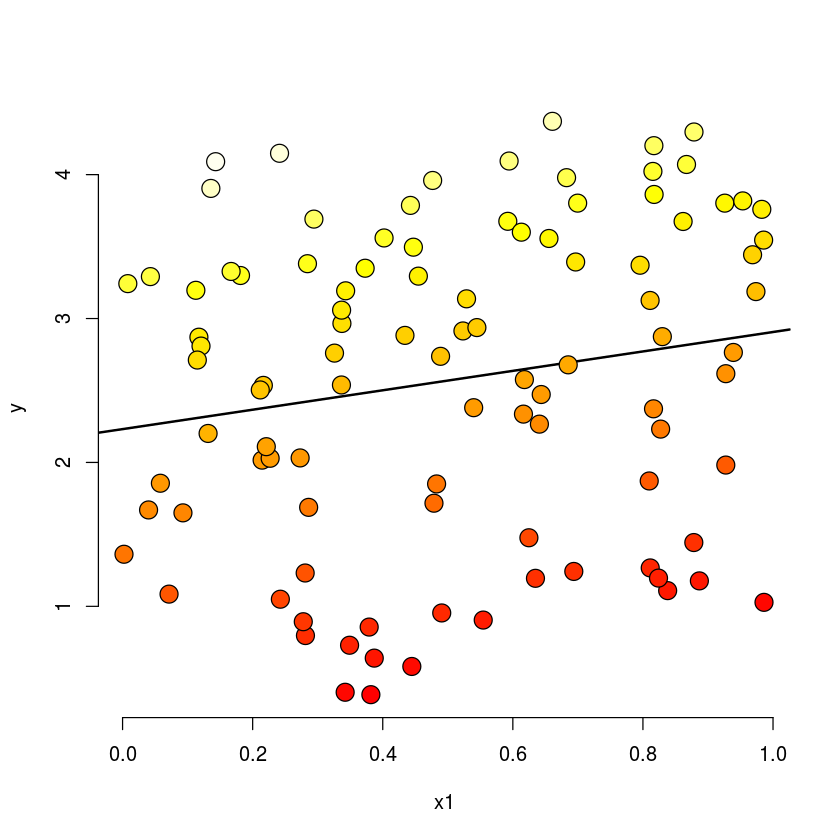

In [149]:
p <- 1
n <- 100; x2 <- runif(n); x1 <- p * runif(n) - (1 - p) * x2 
beta0 <- 0; beta1 <- 1; tau <- 4 ; sigma <- .01
y <- beta0 + x1 * beta1 + tau * x2 + rnorm(n, sd = sigma)
plot(x1, y, type = "n", frame = FALSE)
abline(lm(y ~ x1), lwd = 2)
co.pal <- heat.colors(n)
points(x1, y, pch = 21, col = "black", bg = co.pal[round((n - 1) * x2 + 1)], cex = 2)

This is an example of continuous adjustment. So here we have y, and x1, and x2 is the color-coding of the points right here.

You can actually do the 3-D plot, instead of the 2-D plot with the code below:

In [150]:
library(rgl)
plot3d(x1, x2, y)

Warning message in rgl.init(initValue, onlyNULL):
"RGL: unable to open X11 display"Warning message:
"'rgl_init' failed, running with rgl.useNULL = TRUE"

If you try 3-D plot, you can see that there is this strong relationship between y and x2 and then kind of less clear relationship between x1 and y and that’s the kind of noisy regression line that we saw above.

But what happens if we instead of plotting y versus x1, we plot the residual of y, having taken out the effect of x2. And the residual of x1 having taken out the effect of x2 ?

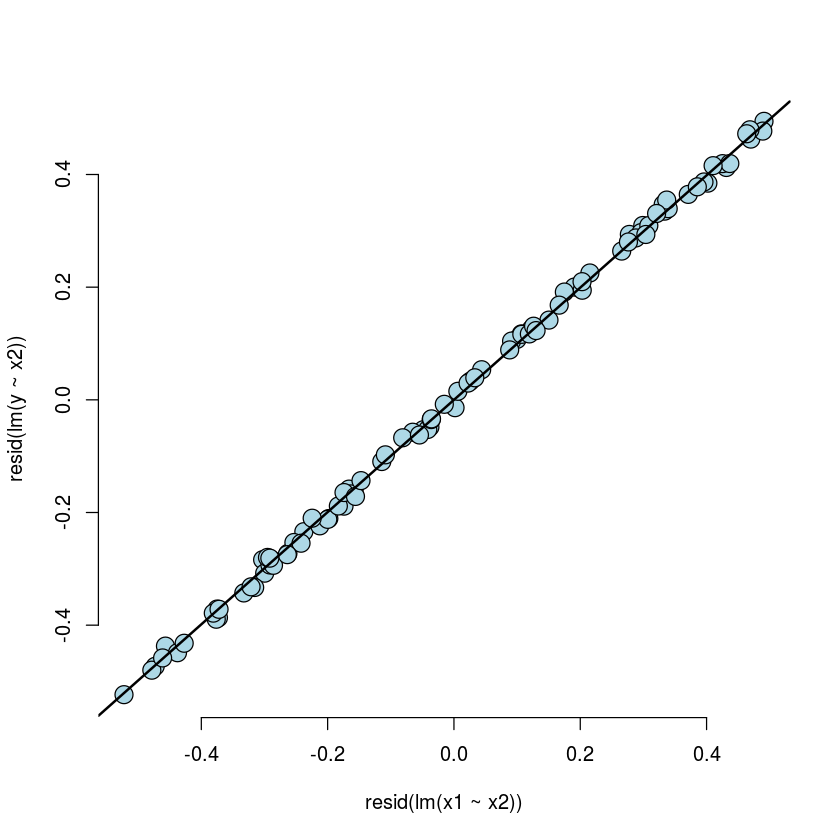

In [151]:
plot(resid(lm(x1 ~ x2)), resid(lm(y ~ x2)), 
     frame = FALSE, col = "black", bg = "lightblue", pch = 21, cex = 2)
abline(lm(I(resid(lm(x1 ~ x2))) ~ I(resid(lm(y ~ x2)))), lwd = 2)

As you see below there’s almost no variation left. So y and x are almost perfectly explained. So the point here was to give you an example where :

* X1 unrelated to X2
* X2 strongly related to Y
* Adjusted relationship between X1 and Y largely unchanged by considering X2.
* Almost no residual variability after accounting for X2.

### Summary
----
* Modeling multivariate relationships is difficult.
* Play around with simulations to see how the inclusion or exclustion of another variable can change analyses.
* The results of these analyses deal with the impact of variables on associations.
* Ascertaining mechanisms or cause are difficult subjects to be added on top of difficulty in understanding multivariate associations.

## Residuals, diagnostics, variation
----
### Introduction
-----
Consider our linear model again which is :

Specified as Yi=∑pk=1Xikβj+ϵiYi=∑k=1pXikβj+ϵi

Where we assume here that ϵi∼iidN(0,σ2)ϵi∼iidN(0,σ2)

and define the residuals as : ei=Yi−Ŷ i=Yi−∑pk=1Xikβ̂ jei=Yi−Y^i=Yi−∑k=1pXikβ^j

and our estimate of residual variation is σ̂ 2=∑ni=1e2in−pσ^2=∑i=1nei2n−p, the n−pn−p so that E[σ̂ 2]=σ2E[σ^2]=σ2

let’s look back at the swiss fertility data and fit a linear model. It gives us these set of different plots and what we are going to talk about what these plots do and why someone would want to plot them.

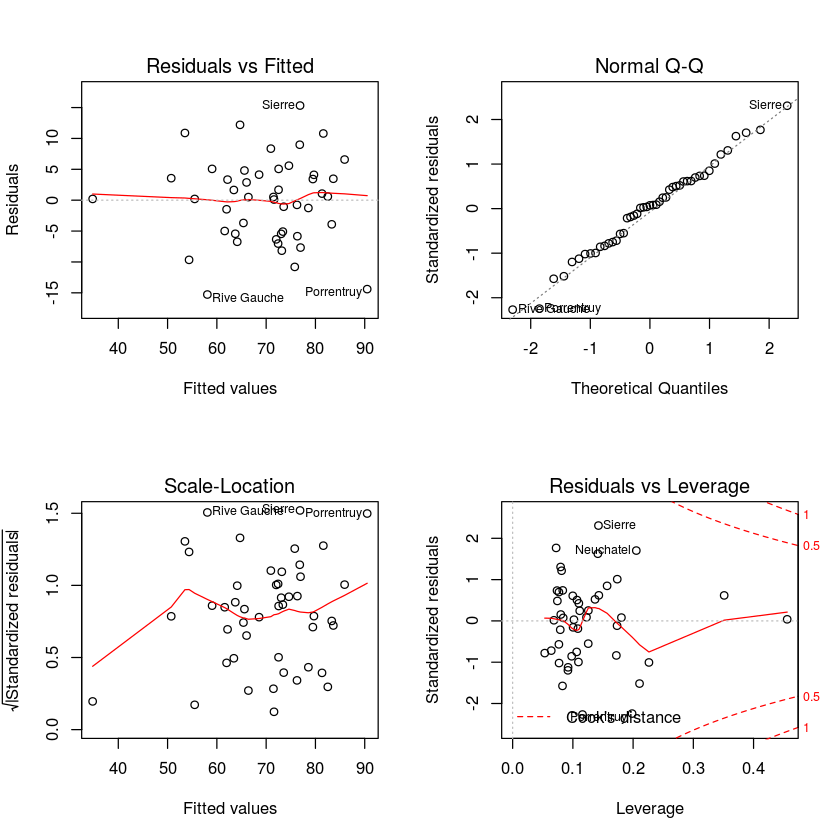

In [152]:
data(swiss)
par(mfrow = c(2, 2))
fit <- lm(Fertility ~ . , data = swiss); plot(fit)

## Influential, high leverage and outlying points
-----
So let’s talk a little bit about outliers and influential points. So consider in plot below the four orange points. Consider the one right in the middle of the data. It probably isn’t very influential on the model fit and it isn’t very deviant from the model behavior.

Upper left hand probably isn’t very influential because it’s right in the middle of the data cloud in the middle of the X values, but it is very aberrant relative to what we kind of perceive to be the model.

Upper right hand point has a lot of potential for influence, in that its not around the X data points at all. So right, remember our regression line has to go through that middle X bar, Y bar points. So a point out here, has a lot of potential for influence. It’s, it’s almost like as if there’s a fulcrum and this is the bar, as you get further out on the bar it has a lot more force, to be able to move the line.So this one has the potential for a lot of influence but elects not to exert it by fitting in nicely with the model that the rest of the data defined.

Fianlly, Lower right hand point if we were to have included this guy in the fit, the regression line would move down. This point is both influential by not being in the data cloud of x’s outlying in the sense that it doesn’t seem to appear to fit the model terribly well.

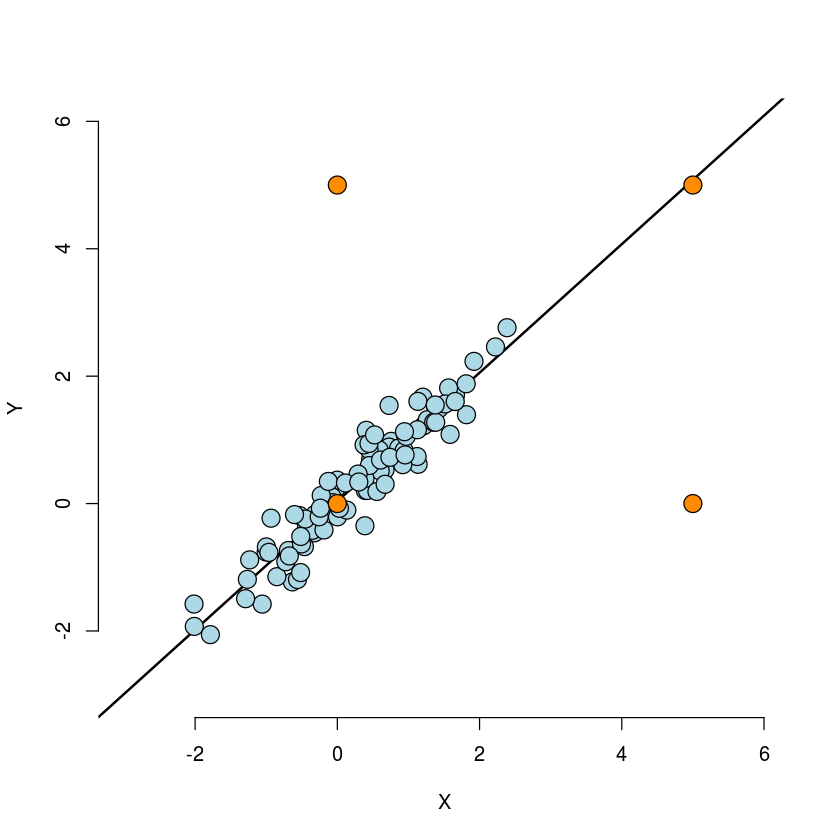

In [153]:
n <- 100; x <- rnorm(n); y <- x + rnorm(n, sd = .3)
plot(c(-3, 6), c(-3, 6), type = "n", frame = FALSE, xlab = "X", ylab = "Y")
abline(lm(y ~ x), lwd = 2)
points(x, y, cex = 2, bg = "lightblue", col = "black", pch = 21)
points(0, 0, cex = 2, bg = "darkorange", col = "black", pch = 21)
points(0, 5, cex = 2, bg = "darkorange", col = "black", pch = 21)
points(5, 5, cex = 2, bg = "darkorange", col = "black", pch = 21)
points(5, 0, cex = 2, bg = "darkorange", col = "black", pch = 21)

In summary, Calling a point an outlier is vague.

* Outliers can be the result of spurious or real processes.
* Outliers can have varying degrees of influence.
* Outliers can conform to the regression relationship (i.e being marginally outlying in X or Y, but not outlying given the regression relationship).
* Upper left hand point has low leverage, low influence, outlies in a way not conforming to the regression relationship.
* Lower left hand point has low leverage, low influence and is not to be an outlier in any sense.
* Upper right hand point has high leverage, but chooses not to extert it and thus would have low actual influence by conforming to the regresison relationship of the other points.
* Lower right hand point has high leverage and would exert it if it were included in the fit.

### Influence measures
----
R has all these great influence measures that it does by default and you can just do `?Influence.measures` to see them and get the help file. The measures include :

* `rstandard` - standardized residuals, residuals divided by their standard deviations)

* `rstudent` - standardized residuals, residuals divided by their standard deviations, where the ith data point was deleted in the calculation of the standard deviation for the residual to follow a t distribution

* `hatvalues` - measures of leverage

* `dffits` - change in the predicted response when the ithith point is deleted in fitting the model.

* `dfbetas` - change in individual coefficients when the ithith point is deleted in fitting the model.

* `cooks.distance` - overall change in teh coefficients when the ithith point is deleted.

* `resid` - returns the ordinary residuals

* `resid(fit) / (1 - hatvalues(fit))` where `fit` is the linear model fit returns the PRESS residuals, i.e. the leave one out cross validation residuals - the difference in the response and the predicted response at data point ii, where it was not included in the model fitting.

So how do I use all these things? Is probably what you are asking yourself .

The number one rule is to be wary of simplistic rules for diagnostic plots and measures. The use of these tools is context specific. It’s better to understand what they are trying to accomplish and use them judiciously.

Not all of the measures have meaningful absolute scales. You can look at them relative to the values across the data.

They probe your data in different ways to diagnose different problems.

Patterns in your residual plots generally indicate some poor aspect of model fit. These can include: * Heteroskedasticity (non constant variance). * Missing model terms. * Temporal patterns (plot residuals versus collection order).

Residual QQ plots investigate normality of the errors.

Leverage measures (hat values) can be useful for diagnosing data entry errors.

Influence measures get to the bottom line, ‘how does deleting or including this point impact a particular aspect of the model’.

### Case 1
----------
So let’s just go through some cases.

Here’s a nice case right here. There’s no regression or relationship between x and y. But we have one outlying point out there.

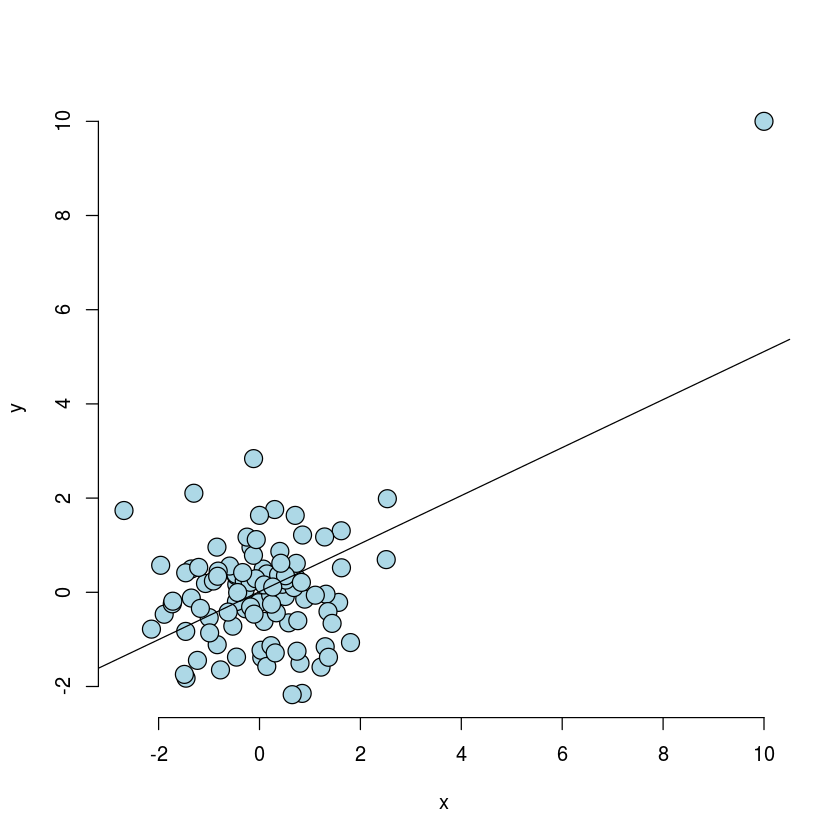

In [154]:
x <- c(10, rnorm(n)); y <- c(10, c(rnorm(n)))
plot(x, y, frame = FALSE, cex = 2, pch = 21, bg = "lightblue", col = "black")
abline(lm(y ~ x))      

The point `c(10, 10)` has created a strong regression relationship where there shouldn’t be one. We get this regression line just by virtue of that. So, this point has huge, potential for influence that it actually exerts.

Lets look at a couple of the diagnostic values. If you look at the `dfbetas`, which are, exactly the difference in the coefficients between what you get if you leave that datapoint in, versus you take it out.



In [156]:
fit <- lm(y ~ x)
round(dfbetas(fit)[1 : 10, 2], 3)

1      2      3      4      5      6      7      8      9     10 
 7.070 -0.004 -0.015  0.000 -0.101 -0.048 -0.012 -0.001  0.047  0.043

You can see obviously the slope coefficient changes dramatically (the first number), if you include that one point that’s driving the whole relationship versus you take it out.

Also, the hat values are, as always measure of potential for influence. And so the first number below, of course, has a giant hat value.

In [157]:
fit <- lm(y ~ x)
round(hatvalues(fit)[1 : 10], 3)

1     2     3     4     5     6     7     8     9    10 
0.501 0.010 0.010 0.010 0.020 0.020 0.011 0.011 0.012 0.022

### Case 2
-------
let’s consider a case where there is a regression relationship.And a point which is outlying there but still quite well fits the regression relationship.

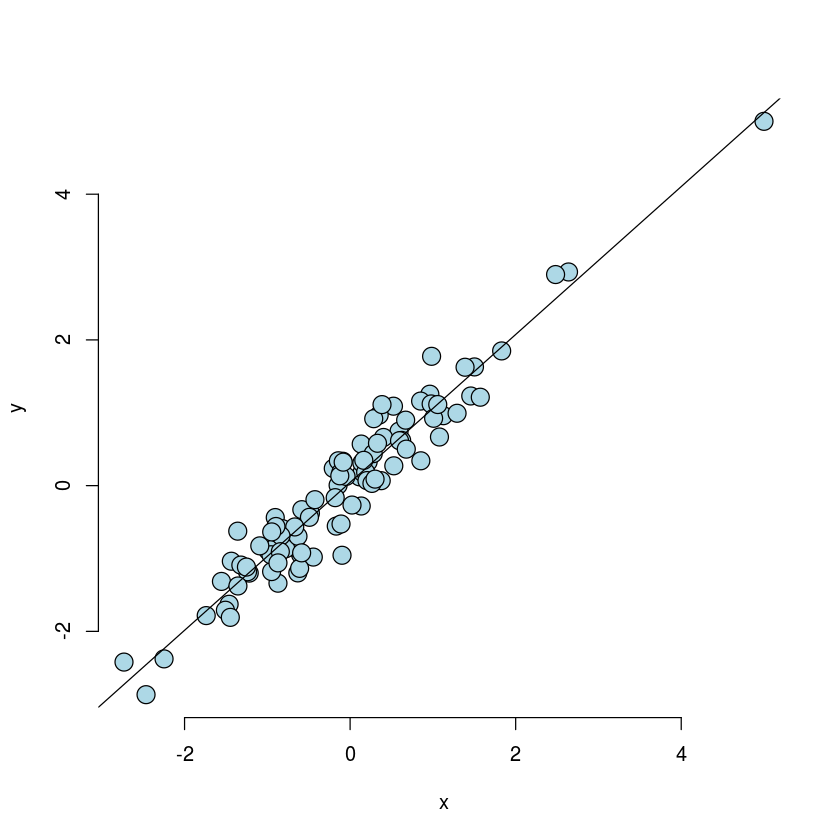

In [158]:
x <- rnorm(n); y <- x + rnorm(n, sd = .3)
x <- c(5, x); y <- c(5, y)
plot(x, y, frame = FALSE, cex = 2, pch = 21, bg = "lightblue", col = "black")
fit2 <- lm(y ~ x)
abline(fit2)            

So in this case, if we do the dfbetas below, you can see that point is generally in line with the other ones, not outrageously so, and the in hat values, it’s hat value is quite a bit bigger than a lot of the other data points.



In [159]:
round(dfbetas(fit2)[1 : 10, 2], 3)

1      2      3      4      5      6      7      8      9     10 
-0.221 -0.091  0.021 -0.007  0.053 -0.143  0.109  0.073  0.089 -0.005

In [160]:
round(hatvalues(fit2)[1 : 10], 3)

1     2     3     4     5     6     7     8     9    10 
0.221 0.027 0.014 0.011 0.012 0.024 0.014 0.024 0.047 0.010

## Example of looking at the residual plots
--------
let’s go through an example of looking at residual plots. Stefanski in the American Statistician paper had this startling example and mechanism for creating them and why it’s useful to look at residual plots.

In [165]:
## Don't everyone hit this server at once.  Read the paper first.
dat <- read.table('http://www4.stat.ncsu.edu/~stefanski/NSF_Supported/Hidden_Images/orly_owl_files/orly_owl_Lin_4p_5_flat.txt', header = FALSE)
pairs(dat)
##403 Forbidden! Fix the link please.

Warning message in file(file, "rt"):
"cannot open URL 'http://www4.stat.ncsu.edu/~stefanski/NSF_Supported/Hidden_Images/orly_owl_files/orly_owl_Lin_4p_5_flat.txt': HTTP status was '403 Forbidden'"

ERROR: Error in file(file, "rt"): cannot open the connection


If you do a standard linear model where it takes the first variable and regresses it on everything else, you see a bunch of highly significant p values. Should we bother to do a residual plot?

In [166]:
summary(lm(V1 ~ . -1, data = dat))$coef

ERROR: Error in eval(expr, envir, enclos): object 'V1' not found


However, there’s clearly an evidence, aspect of some pattern in the residuals. Because if you fit the model, and then plot the residuals versus the predicted values, which if you have a multivariate regression model, it’s often useful to, there’s obviously some sort of pattern there.

ERROR: Error in eval(expr, envir, enclos): object 'V1' not found


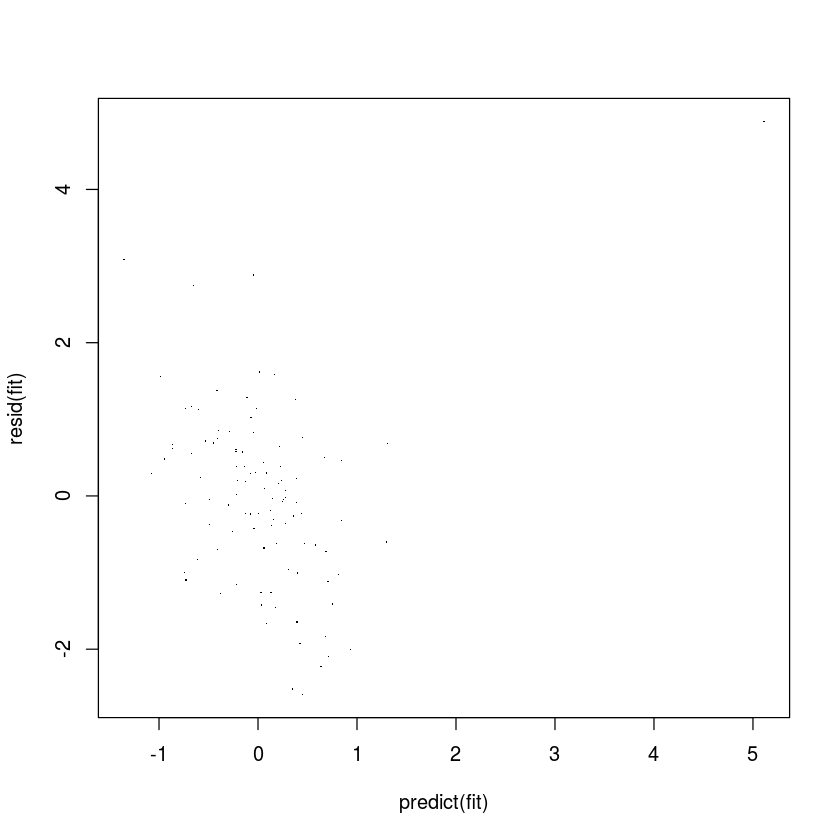

In [167]:
fit <- lm(V1 ~ . - 1, data = dat); plot(predict(fit), resid(fit), pch = '.')

## Back to the Swiss data
---------
So let’s look back at the Swiss data and see what these different plots are trying to accomplish a little bit.


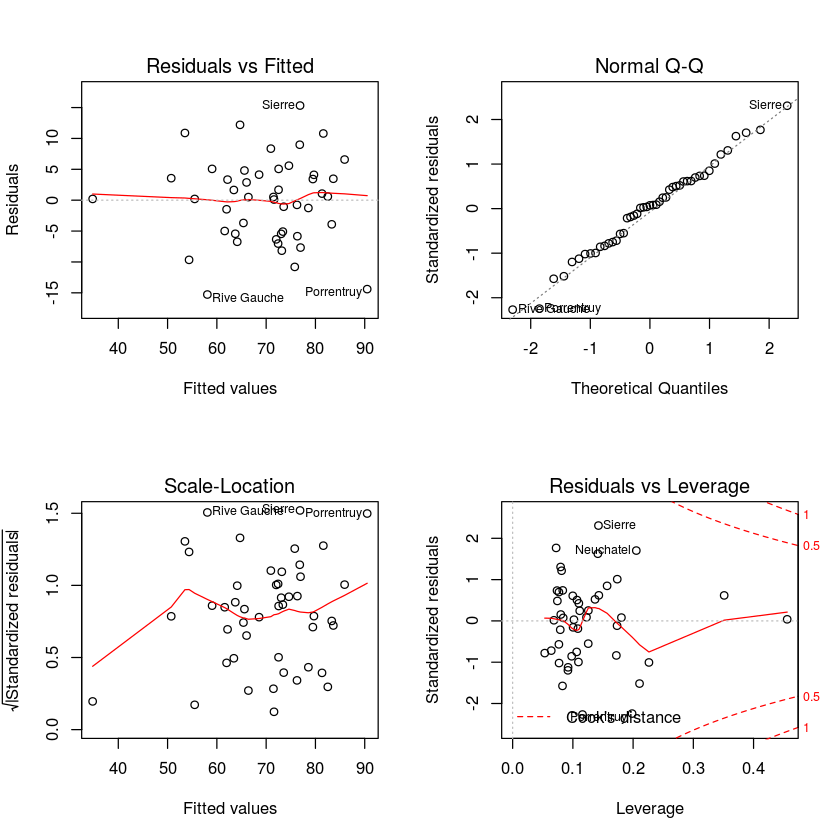

In [168]:
data(swiss); par(mfrow = c(2, 2))
fit <- lm(Fertility ~ . , data = swiss); plot(fit)

So, the residuals versus the fitted values, we’re looking for any sort of pattern.

Same thing with the fitted values versus the standardized, where it’s plotting a function of the standardized residuals.

The normal Q-Q plot, is you’re trying to figure out the normality of the errors by plotting the theoretical quantiles of the standard normal distribution by the standardized residuals.

And then residuals versus leverage, that’s where you want to look at the comparison of fit at that point verses the potential for influence of that point. So this is also a very useful plot to look at.

We would also suggest to go through the example of looking at the dffits and the dfbetas, and cooks distance for all of these data set where you’re interested in looking at whether or not one of the particular provinces seems influential or has a particular kind of, large effect.

## Multiple variables
-----
### Some thoughts on model selection
In this section we talk about the difficult topic of navigating when you have multiple predictors and choosing a model, and what are the consequences of including variables that you shouldn’t or not including variables that you should.

Here we’re going to focus on modeling rather than prediction and machine learning which is a big topic and requires a separate discusssion.

Prediction has a different set of criteria, needs for interpretability and standards for generalizability. It’s just a different problem.

In modeling, our interest lies in parsimonious, interpretable representations of the data that enhance our understanding of the phenomena under study. So we want a small model that’s a good representation of the data, that teaches us something in an interpretable way.

**A model is a lense through which to look at your data.** (I attribute this quote to Scott Zeger). Under this philosophy, what’s the right model? Whatever model connects the data to a true, parsimonious statement about what you’re studying.

So, complicated model where you don’t learn anything is less interesting than a parsimonious model where you learned something that’s true.

There are nearly uncontable ways that a model can be wrong, you can have the sampling assumptions wrong, you can have the Distributional assumption’s wrong, You can have the linearity wrong, You can have which covariates you included or excluded is wrong. But in this section, we’ll focus on variable inclusion and exclusion.

Like nearly all aspects of statistics, good modeling decisions are context dependent. For example a good model for prediction versus one for studying mechanisms versus one for trying to establish causal effects may not be the same.

**The Rumsfeldian triplet**

So Donald Rumsfeld had this interesting quote kind of infamous quote I guess, and it goes like this :

There are known knowns. These are things we know that we know. There are known unknowns. That is to say, there are things that we know we don’t know. But there are also unknown unknowns. There are things we don’t know we don’t know. Donald Rumsfeld

It’s kind of a funny quote and interesting quote that kind of gets talked about a lot in statistics because it relates very well to what we think about.

So in our context:

* (Known knowns) Regressors that we know we should check to include in the model and have.
* (Known Unknowns) Regressors that we would like to include in the model, but don’t have.
* (Unknown Unknowns) Regressors that we don’t even know about that we should have included in the model.


### General rules
------
So, some general rules about variable inclusion and regression.

Omitting variables results in bias in the coeficients of interest - unless their regressors are uncorrelated with the omitted ones. This is why we randomize treatments, it attempts to uncorrelate our treatment indicator with variables that we don’t have to put in the model. So this is why, in case you were wondering we randomize treatments, or why randomized trials, randomized experiments are the standard for evidence.

Because if you want to look at something, say a treatment effect, and you’re worried you didn’t include a variable. The randomization gives you some hope that the treatment assignment is uncorrelated with these unknown unknown’s.

Now of course if there’s way too many unknown unknown’s just by chance they’re going to be aliased with your treatment effect. Therefore If there’s too many unobserved confounding variables, even randomization won’t help you, which is a problem and because they’re unknown you don’t know how many they are. But randomization today is probably the best strategy around for trying to balance unknown confounders.

But often you can’t randomize. So if you can’t randomize and you really do need to include a variable in the model and you omit it, then it’s going to induce bias in the variables in the coefficients that you’re interested in.

So why not just throw everything into my regression model? Including variables that we shouldn’t have increases standard errors of the regression variables. Actually, including any new variables increasese (actual, not estimated) standard errors of other regressors. So we don’t want to idly throw variables into the model. I want to emphasize this point that it increases the actual standard errors not the estimated standard errors.

The model must tend toward perfect fit as the number of non-redundant regressors approaches nn. By non-redundant I mean the model doesn’t do any work if you include X and 2X and 4X. Those are all just three, the same variable with a different multiplier. But if you have a response Y, and there’s 20 measurements, then you include 20 regressors that are just simulated random noise. Then you will achieve perfect fit, even though those regressors have nothing to do with Y.

R^2 increases monotonically as more regressors are included. So the proportion of the variation in the Y is explained by the regressors increases monotonically regardless of whether the regressors are important.

Also the SSE decreases monotonically as more regressors are included.

So here, just as an example, here is a here’s a bunch of simulations. So no actual regression relationship exists in any simulation. So you can just see I’m just putting random noise into into a response and you see as you get up toward 100, you’re, you’re guaranteed to get 100% of the variation explained in the Ys.

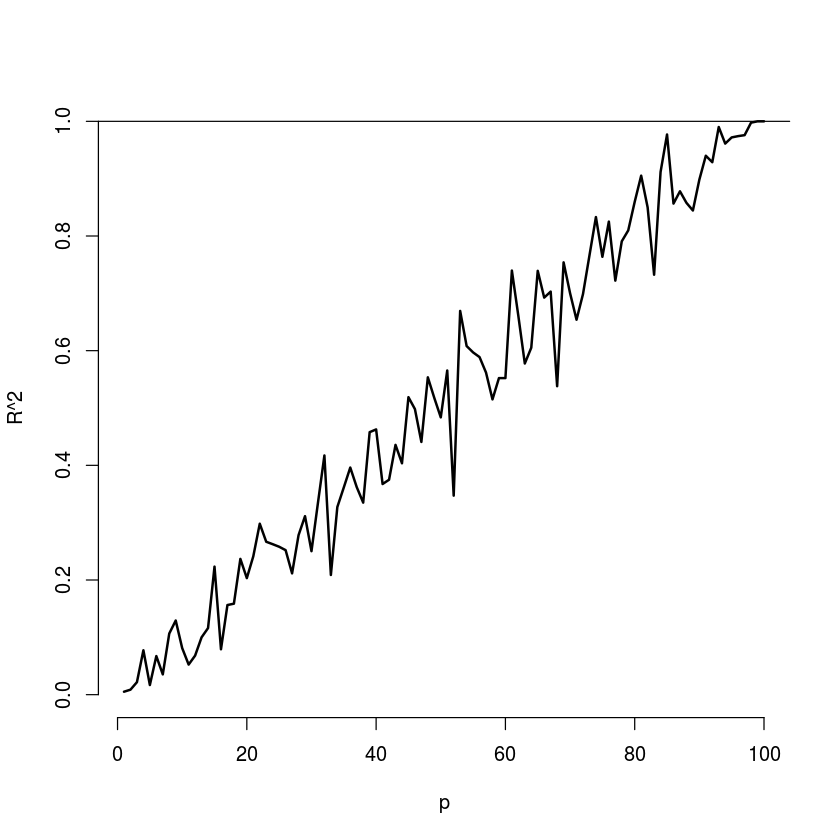

In [169]:
 n <- 100
plot(c(1, n), 0 : 1, type = "n", frame = FALSE, xlab = "p", ylab = "R^2")
r <- sapply(1 : n, function(p)
      {
        y <- rnorm(n); x <- matrix(rnorm(n * p), n, p)
        summary(lm(y ~ x))$r.squared 
      }
    )
lines(1 : n, r, lwd = 2)
abline(h = 1)

## Variance inflation
-----
Now let’s look at variance inflation. As mentioned before, this is a statement about the true **standard error.** So below we do a simulation (1000 times) to look at the true standard errors. So below I’ve repeatedly simulated from the regression model, and I’ve gotten the beta one coefficient. And I’m going to look at that distribution and the standard deviation of that distribution is the population standard error of beta one.


In [170]:
n <- 100; nosim <- 1000
x1 <- rnorm(n); x2 <- rnorm(n); x3 <- rnorm(n); 
betas <- sapply(1 : nosim, function(i){
  y <- x1 + rnorm(n, sd = .3)
  c(coef(lm(y ~ x1))[2], 
    coef(lm(y ~ x1 + x2))[2], 
    coef(lm(y ~ x1 + x2 + x3))[2])
})
round(apply(betas, 1, sd), 5)

x1      x1      x1 
0.03250 0.03247 0.03293

What you can see is in the first case, where we only have x1, we get a standard error of .028, then it goes up a little bit higher, .02872. If we include x2 in the model, and it goes up even a little bit higher, if we include x3 in the model. That’s the variance inflation. (numbers will be different because of the simulation)

But you, you can make the invariance inflation muchworse. If here’s our x1, which is a normal. But now instead of instead of x2 being just another random normal, I made x2 a average of some random normals and x1 a kind of average. In this case now the variance of x3 is also 1 but x3 is highly related to x1.

In [171]:
n <- 100; nosim <- 1000
x1 <- rnorm(n); x2 <- x1/sqrt(2) + rnorm(n) /sqrt(2)
x3 <- x1 * 0.95 + rnorm(n) * sqrt(1 - 0.95^2); 
betas <- sapply(1 : nosim, function(i){
  y <- x1 + rnorm(n, sd = .3)
  c(coef(lm(y ~ x1))[2], 
    coef(lm(y ~ x1 + x2))[2], 
    coef(lm(y ~ x1 + x2 + x3))[2])
})
round(apply(betas, 1, sd), 5)

x1      x1      x1 
0.03139 0.03963 0.11366

Now you can see for x1, here’s my standard error estimated by simulation. If I include x2 I get a small amount of variance inflation and then I get a huge amount of variance in inflation.

So, the, the more correlated your regressors are, the more variance inflation you’re going to see.

Therefore we can conclude :

* Notice variance inflation was much worse when we included a variable that was highly related to x1.

* We don’t know σσ, so we can only estimate the increase in the actual standard error of the coefficients for including a regressor.

* However, σσ drops out of the relative standard errors. If one sequentially adds variables, one can check the variance (or sd) inflation for including each one.

* When the other regressors are actually orthogonal to the regressor of interest, then there is no variance inflation.

* The variance inflation factor (VIF) is the increase in the variance for the ith regressor compared to the ideal setting where it is orthogonal to the other regressors. (The square root of the VIF is the increase in the sd …)

* Remember, variance inflation is only part of the picture. We want to include certain variables, even if they dramatically inflate our variance.

### Revisiting our previous simulation
So, lets revisit our previous simulation :

In [173]:
##doesn't depend on which y you use,
y <- x1 + rnorm(n, sd = .3)
a <- summary(lm(y ~ x1))$cov.unscaled[2,2]
c(summary(lm(y ~ x1 + x2))$cov.unscaled[2,2],
  summary(lm(y~ x1 + x2 + x3))$cov.unscaled[2,2]) / a

[1]  1.688597 13.557337

In [174]:
temp <- apply(betas, 1, var); temp[2 : 3] / temp[1]

x1        x1 
 1.593627 13.111687

o what this means is, we get a 90% increase in variation from the model that only includes x1 by including x2. And we get, you know, a nine-fold increase in variation by including x3. And that’s exactly what we saw in the simulation.
## Looking at swiss dataset
------
Lets look at the swiss dataset.

In [175]:
data(swiss)
fit1 <- lm(Fertility ~ Agriculture, data = swiss)
a <- summary(fit1)$cov.unscaled[2,2]
fit2 <- update(fit, Fertility ~ Agriculture + Examination)
fit3 <- update(fit, Fertility ~ Agriculture + Examination + Education)
  c(summary(fit2)$cov.unscaled[2,2],
    summary(fit3)$cov.unscaled[2,2]) / a 

[1] 1.891576 2.089159

So we get 90% increase in variance when I include examination and then 100% increase in variance when I include examination and education. Now again this is, variance inflation. It’s just part of the picture. I think in this model, we would want to include those variablees because we would want to see, is the agriculture effect is attributable, to some of these other effects

**Swiss data VIFs**

And you can get the variance inflation factors for every coefficient and its the comparison of how much variance has increased compared to, if all the covariants were orthogonal.

It’s clear that things like education and examination are very high, because they’re very correlated with each other. So you can use these to see for a given covariant how much variance it appears to be adding relative to a model where it had all the covariants being orthogonal.

In [176]:
library(car)
fit <- lm(Fertility ~ . , data = swiss)
vif(fit)



Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



Agriculture      Examination        Education         Catholic 
        2.284129         3.675420         2.774943         1.937160 
Infant.Mortality 
        1.107542

In [177]:
sqrt(vif(fit)) #I prefer sd 

Agriculture      Examination        Education         Catholic 
        1.511334         1.917138         1.665816         1.391819 
Infant.Mortality 
        1.052398

## What about residual variance estimation?
-------

So what happens to residual variance estimation when we, forget or omit or include variables that we should have or shouldn’t have.

Assuming that the model is linear with additive iid errors (with finite variance), we can mathematically describe the impact of omitting necessary variables or including unnecessary ones.

* If we underfit the model, the variance estimate is biased.
* If we correctly or overfit the model, including all necessary covariates and/or unnecessary covariates, the variance estimate is unbiased.
* However, the variance of the variance is larger if we include unnecessary variables.

## Covariate model selection
-----


* Automated covariate selection is a difficult topic. It depends heavily on how rich of a covariate space one wants to explore. The space of models explodes quickly as you add interactions and polynomial terms.

* In the prediction class, we’ll cover many modern methods for traversing large model spaces for the purposes of prediction.

* Principal components or factor analytic models on covariates are often useful for reducing complex covariate spaces.

* Good design can often eliminate the need for complex model searches at analyses; though often control over the design is limited.

* If the models of interest are nested and without lots of parameters differentiating them, it’s fairly uncontroversial to use nested likelihood ratio tests. (Example to follow.)

* My favoriate approach is as follows. Given a coefficient that I’m interested in, I like to use covariate adjustment and multiple models to probe that effect to evaluate it for robustness and to see what other covariates knock it out. This isn’t a terribly systematic approach, but it tends to teach you a lot about the the data as you get your hands dirty.

### How to do nested model testing in R



In [178]:
fit1 <- lm(Fertility ~ Agriculture, data = swiss)
fit3 <- update(fit, Fertility ~ Agriculture + Examination + Education)
fit5 <- update(fit, Fertility ~ Agriculture + Examination + Education + Catholic + Infant.Mortality)
anova(fit1, fit3, fit5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
45,6283.116,NA,NA,NA,NA
43,3180.925,2,3102.191,30.21074,8.637826e-09
41,2105.043,2,1075.882,10.47750,2.111080e-04
